<a href="https://colab.research.google.com/github/Annual-21/Annual-21/blob/main/Copy_of_ProjectBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 91% 135M/149M [00:00<00:00, 231MB/s]
100% 149M/149M [00:00<00:00, 194MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []
  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)
  # Create a DataFrame with the collected data
  df = pd.DataFrame({
    'Class Path': class_paths,
    'Class': classes
  })
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


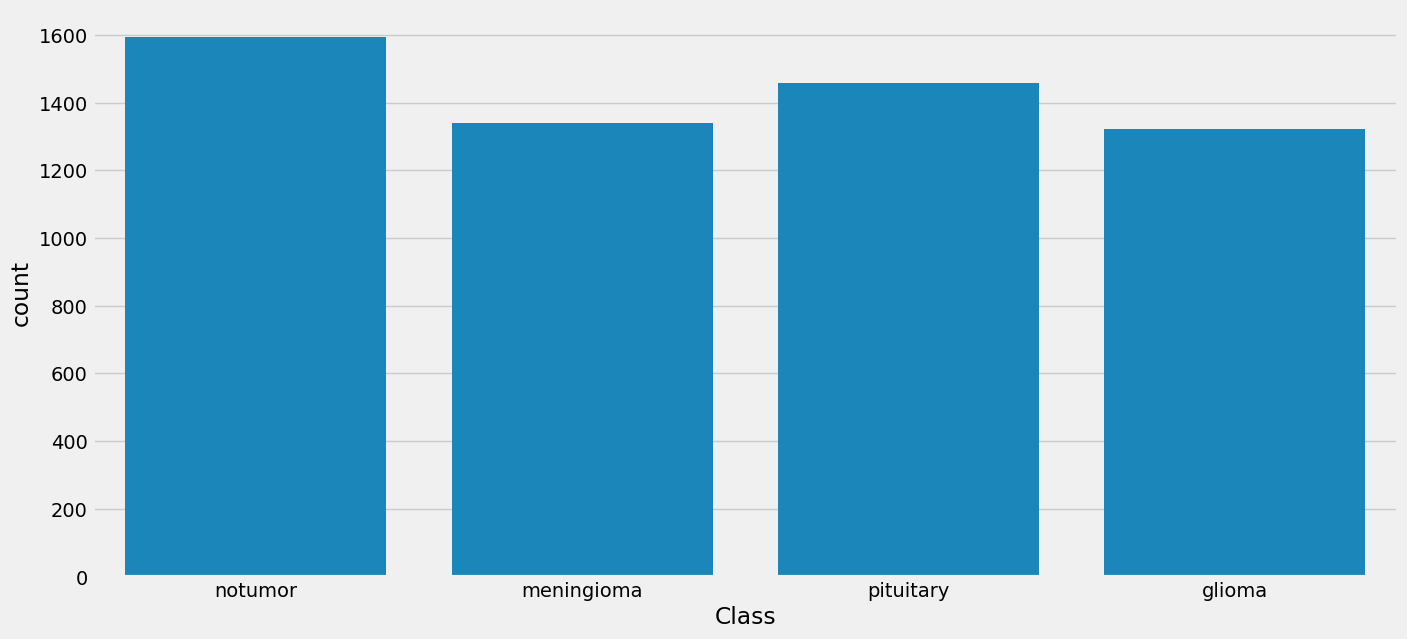

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

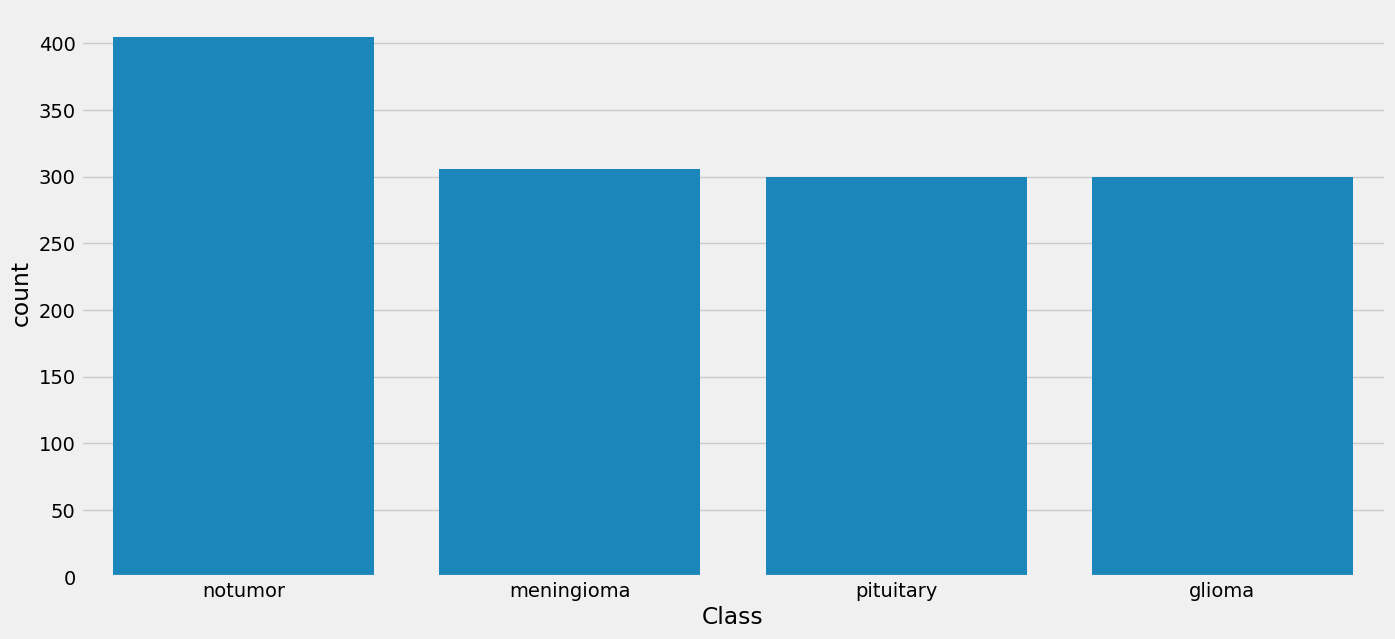

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df,ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
585,/content/Testing/meningioma/Te-me_0301.jpg,meningioma
358,/content/Testing/notumor/Te-no_0346.jpg,notumor
1035,/content/Testing/glioma/Te-gl_0243.jpg,glioma
794,/content/Testing/pituitary/Te-pi_0050.jpg,pituitary
728,/content/Testing/pituitary/Te-pi_0068.jpg,pituitary
...,...,...
421,/content/Testing/meningioma/Te-me_0259.jpg,meningioma
469,/content/Testing/meningioma/Te-meTr_0009.jpg,meningioma
1060,/content/Testing/glioma/Te-gl_0072.jpg,glioma
633,/content/Testing/meningioma/Te-me_0127.jpg,meningioma


In [ ]:
batch_size = 32
img_size = (299,299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
y_col='Class',
batch_size=batch_size,
target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
y_col='Class',
batch_size=batch_size,
target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
y_col='Class',
batch_size=batch_size,
target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


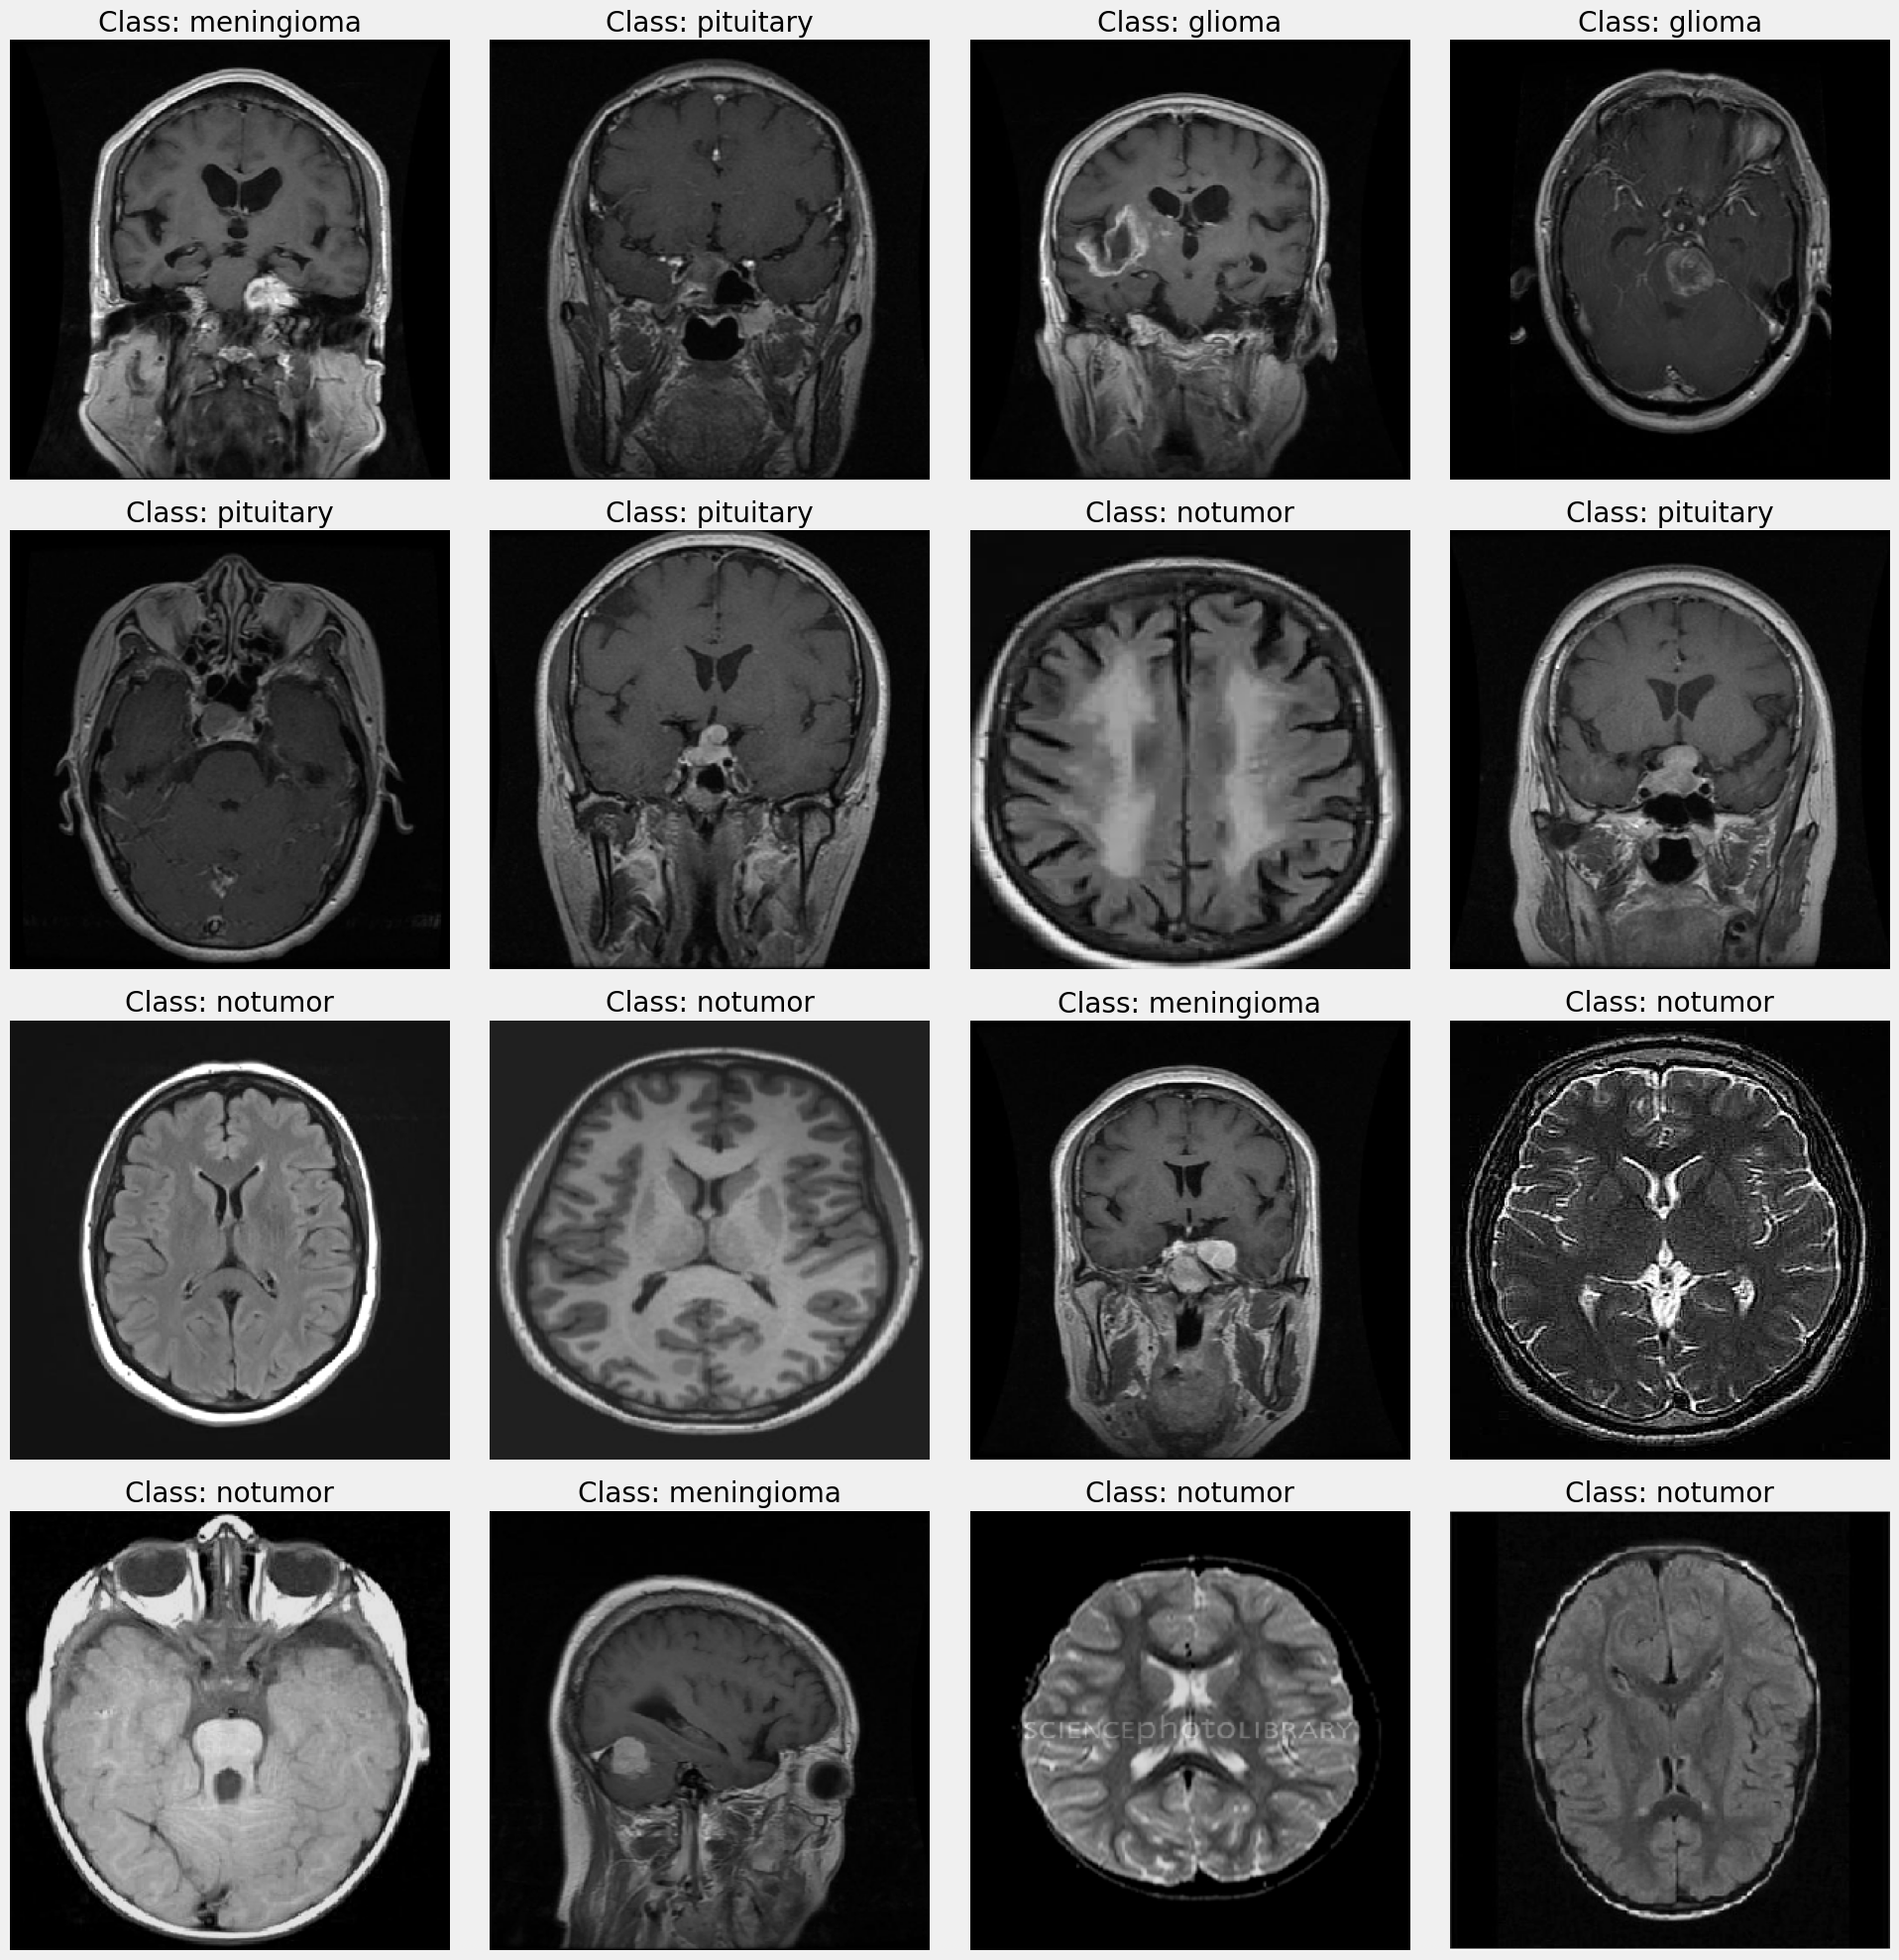

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch [0] [0]
  label = batch [1] [0]
  plt.imshow(image)
  # Get the class index
  class_index = np.argmax(label)
  #Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)
  # Get the class name using the index position
  class_name = class_names [index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')
  plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top= False,
weights= "imagenet",
input_shape= img_shape,
pooling= 'max')

model = Sequential([
base_model,
Flatten(),
Dropout(rate= 0.3),
Dense (128, activation= 'relu'),
Dropout(rate= 0.25),
Dense(4, activation= 'softmax')
])

In [ ]:
model.compile(Adamax(learning_rate= 0.001),
loss= 'categorical_crossentropy',
metrics= ['accuracy',
Precision(),
Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 888ms/step - accuracy: 0.6812 - loss: 0.8650 - precision_3: 0.7756 - recall_3: 0.5195 - val_accuracy: 0.8931 - val_loss: 0.3394 - val_precision_3: 0.8997 - val_recall_3: 0.8763
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 826ms/step - accuracy: 0.9760 - loss: 0.0854 - precision_3: 0.9771 - recall_3: 0.9734 - val_accuracy: 0.9420 - val_loss: 0.1842 - val_precision_3: 0.9448 - val_recall_3: 0.9405
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 798ms/step - accuracy: 0.9929 - loss: 0.0246 - precision_3: 0.9929 - recall_3: 0.9925 - val_accuracy: 0.9771 - val_loss: 0.0816 - val_precision_3: 0.9771 - val_recall_3: 0.9771
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 795ms/step - accuracy: 0.9930 - loss: 0.0221 - precision_3: 0.9935 - recall_3: 0.9924 - val_accuracy: 0.9695 - val_loss: 0.1762 - val_precision_3: 0.9709 - val_recall_3: 0.9695
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 795ms/step - accuracy: 0.9963 - loss: 0.0131 - precision_3: 0.9966 - recall_3: 0.9

In [ ]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'precision_3', 'recall_3', 'val_accuracy', 'val_loss', 'val_precision_3', 'val_recall_3'])


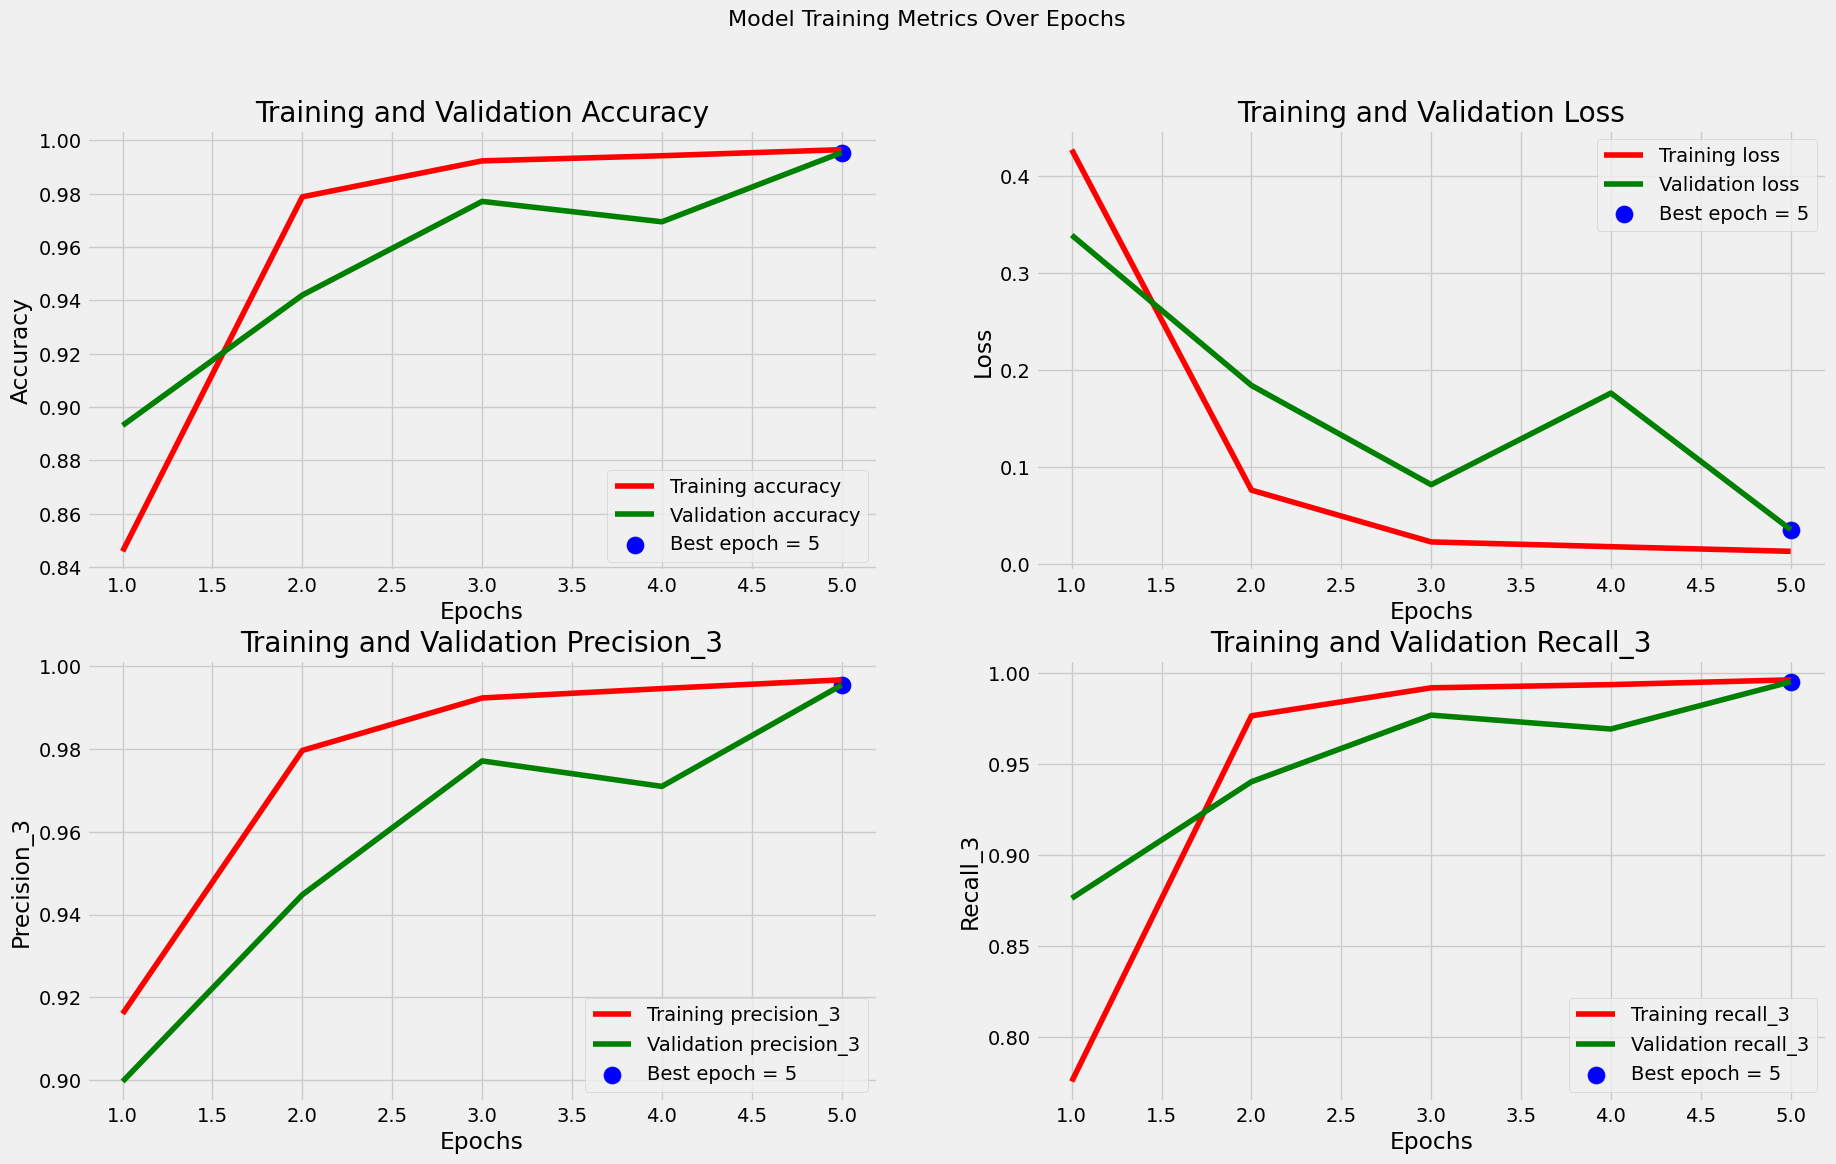

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_3', 'recall_3']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score [1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {valid_score [1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9998 - loss: 0.0013 - precision_3: 0.9998 - recall_3: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9973 - loss: 0.0210 - precision_3: 0.9973 - recall_3: 0.9973


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9925 - loss: 0.0247 - precision_3: 0.9925 - recall_3: 0.9925
Train Accuracy: 99.95%
Train Loss: 0.0020


Validation Accuracy: 99.54%
Validation Loss: 0.0365


Test Accuracy: 99.09%
Test Loss: 0.0348


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step


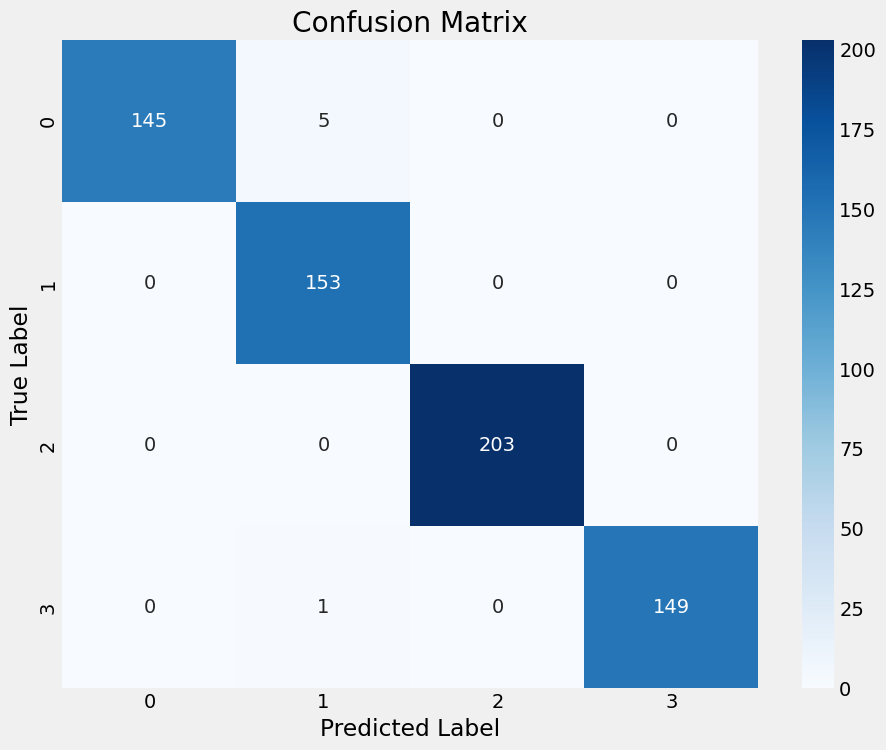

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}
# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())
  # Create figure
  plt.figure(figsize=(6,8))
  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0
  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions [0])
  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict [predicted_class_idx]
  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")
  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")
  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()
  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


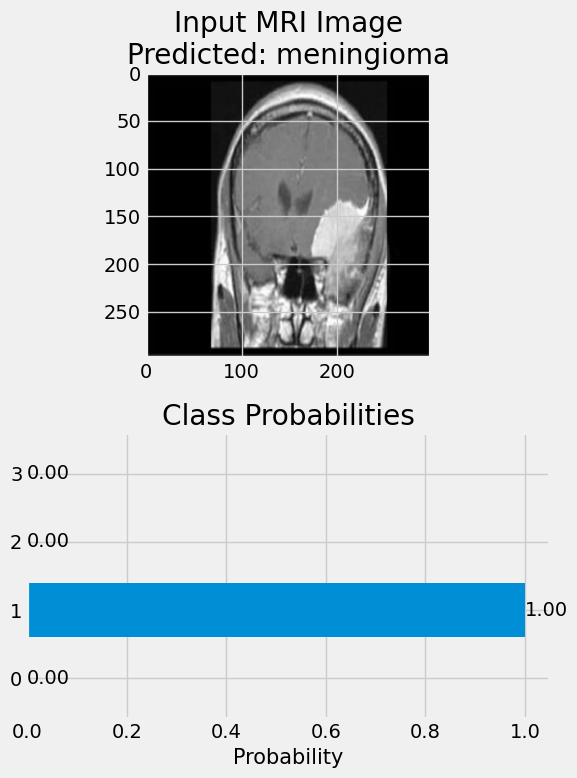


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


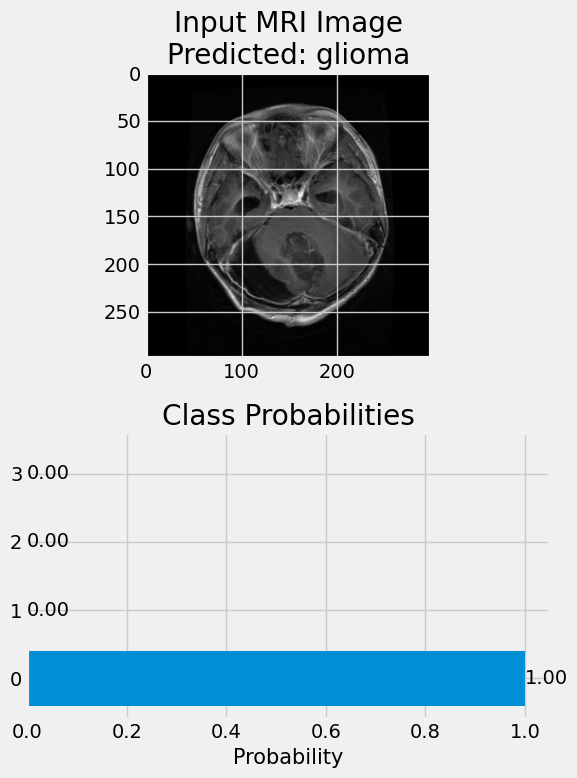


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224, 224)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
y_col='Class',
batch_size=batch_size,
target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
y_col='Class',
batch_size=batch_size,
target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
y_col='Class',
batch_size=16,
target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()
# Convolutional layers
cnn_model.add(Conv2D (512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D (64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output for fully connected layers
cnn_model.add(Flatten())
# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))
cnn_model.add(Dense (4, activation='softmax')) # Output layer with 4 neurons for the 4 classes
# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])
# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 108s 287ms/step - accuracy: 0.5686 - loss: 2.3531 - precision_4: 0.6994 - recall_4: 0.3815 - val_accuracy: 0.7542 - val_loss: 0.8913 - val_precision_4: 0.7936 - val_recall_4: 0.7221
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 284ms/step - accuracy: 0.8106 - loss: 0.7520 - precision_4: 0.8360 - recall_4: 0.7830 - val_accuracy: 0.7328 - val_loss: 0.7646 - val_precision_4: 0.7638 - val_recall_4: 0.7160
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 290ms/step - accuracy: 0.8491 - loss: 0.5458 - precision_4: 0.8652 - recall_4: 0.8300 - val_accuracy: 0.8534 - val_loss: 0.5322 - val_precision_4: 0.8792 - val_recall_4: 0.8336
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 283ms/step - accuracy: 0.8889 - loss: 0.4400 - precision_4: 0.8975 - recall_4: 0.8803 - val_accuracy: 0.9023 - val_loss: 0.4037 - val_precision_4: 0.9071 - val_recall_4: 0.8947
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 101s 283ms/step - accuracy: 0.9140 - loss: 0.3740 - precision_4: 0.9194 - recall_4: 0.9

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_4', 'recall_4', 'val_accuracy', 'val_loss', 'val_precision_4', 'val_recall_4'])


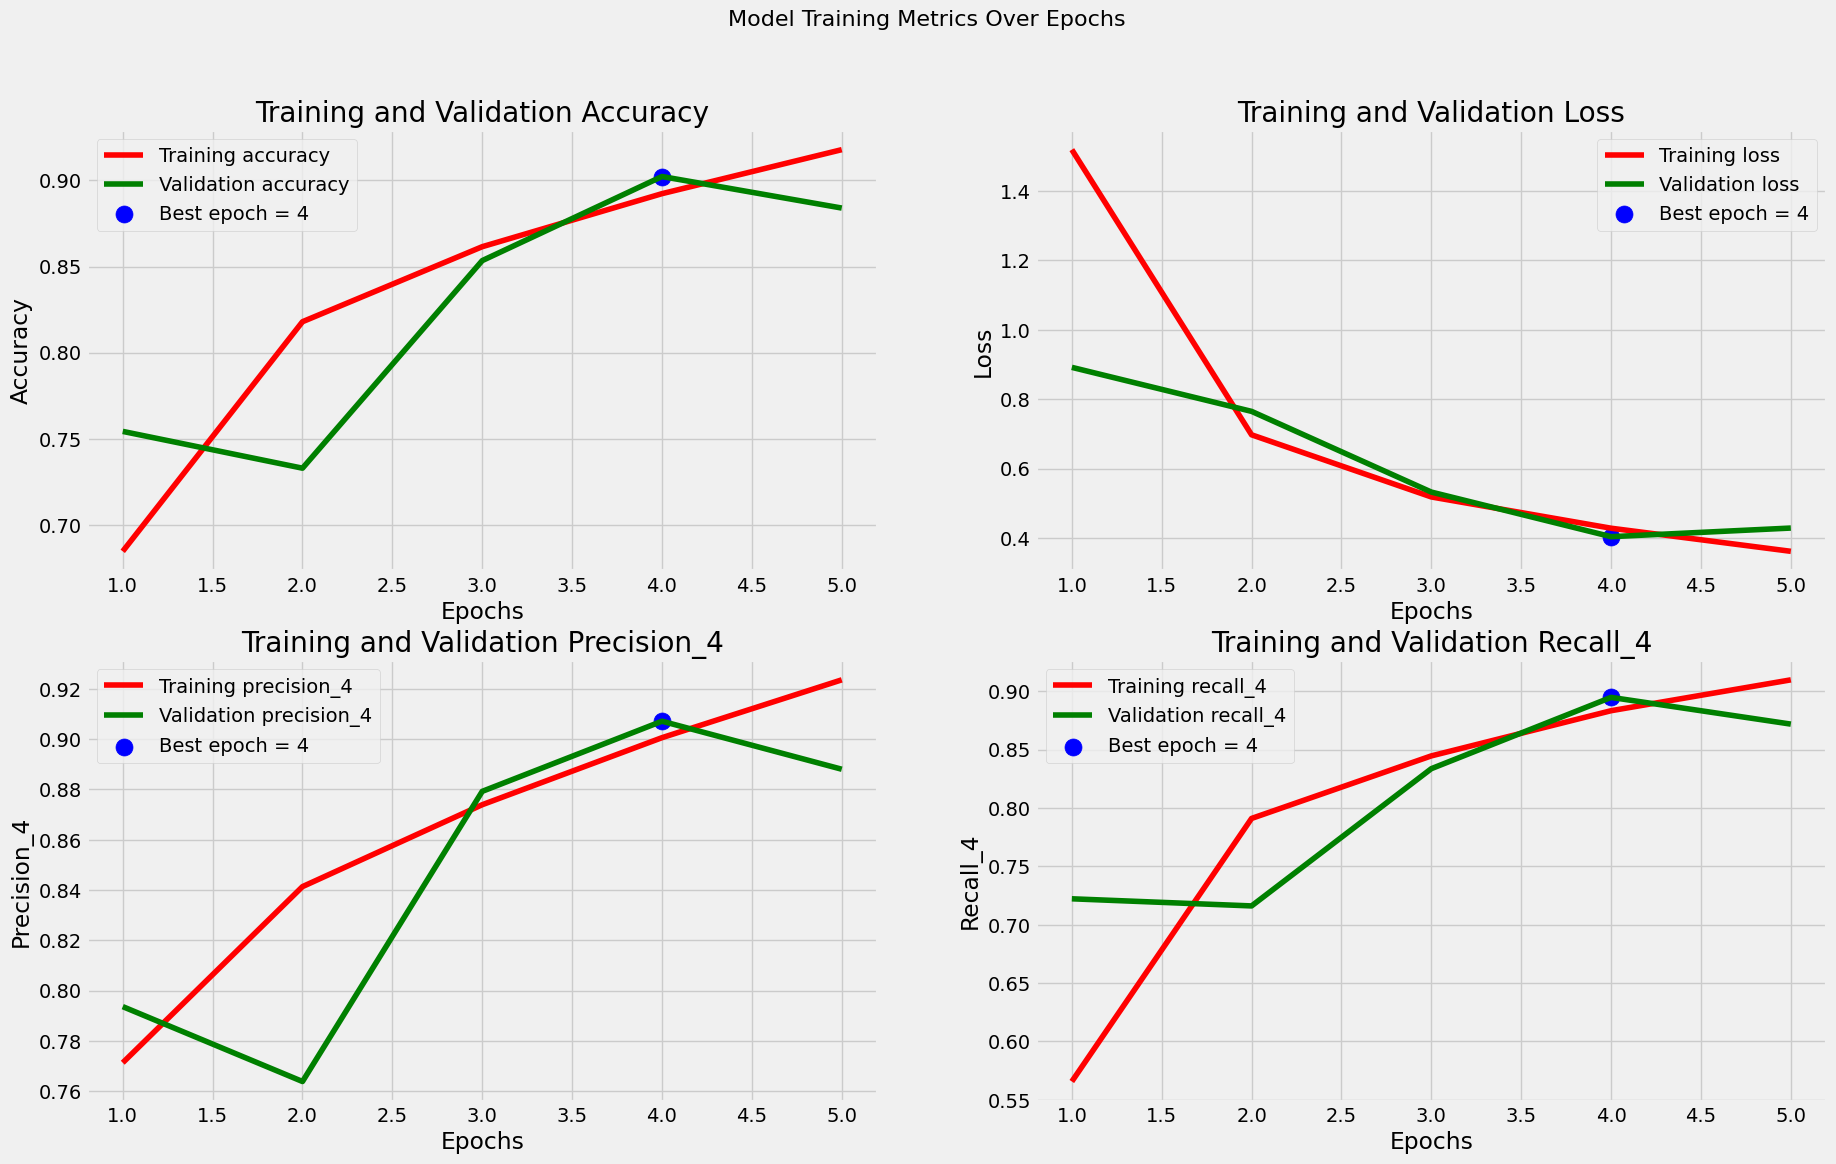

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_4', 'recall_4']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)
print(f"Train Accuracy: {train_score [1]*100:.2f}%")
print(f"Train Loss: {train_score [0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score [1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score [1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9366 - loss: 0.3113 - precision_4: 0.9421 - recall_4: 0.9236
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8855 - loss: 0.4079 - precision_4: 0.8957 - recall_4: 0.8766
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 1.0000 - loss: 0.1931 - precision_4: 1.0000 - recall_4: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8908 - loss: 0.4397 - precision_4: 0.8907 - recall_4: 0.8634
Train Accuracy: 93.73%
Train Loss: 0.3112


Validation Accuracy: 87.94%
Validation Loss: 0.4221


Test Accuracy: 88.11%
Test Loss: 0.4354


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


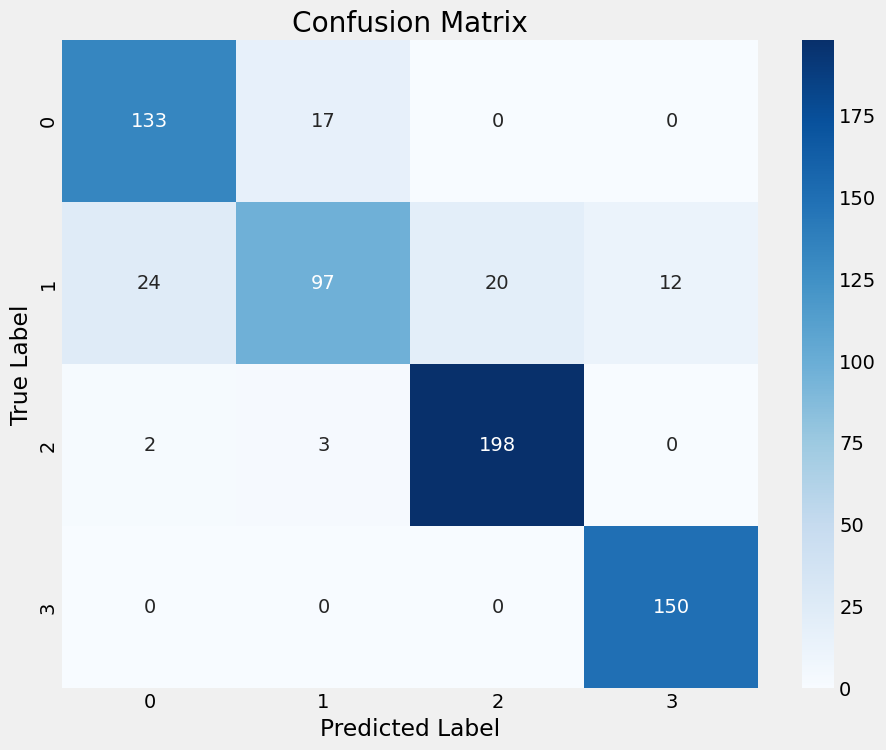

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}
# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       150
           1       0.83      0.63      0.72       153
           2       0.91      0.98      0.94       203
           3       0.93      1.00      0.96       150

    accuracy                           0.88       656
   macro avg       0.87      0.87      0.87       656
weighted avg       0.88      0.88      0.88       656



In [ ]:
cnn_model.save("cnn_model.h5")

Part 2 : Streamlit Web App

In [ ]:
! pip install streamlit pyngrok python-dotenv

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL. Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions [:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()
  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)
  # Create a circular mask for the brain area
  center = (gradients.shape [0] // 2, gradients.shape [1] // 2)
  radius = min(center [0], center [1]) - 10
  y, x = np.ogrid[:gradients.shape[0], gradients.shape[1]]
  mask = (x - center [0])**2 + (y - center [1])**2 <= radius**2
  # Apply mask to gradients
  gradients = gradients * mask
  # Normalize only the brain area
  brain_gradients = gradients [mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients .min()) / (brain_gradients.max() - brain_gradients.min())
  gradients [mask] = brain_gradients
  # Apply a higher threshold
  threshold = np.percentile (gradients [mask], 80)
  gradients [gradients < threshold] = 0
  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap (np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)
  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img_array)  # Changed 'img' to 'img_array'
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)
  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')
  model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense (128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
  ])
  model.build((None,) + img_shape)
  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])
  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio(
    "Select Model",
    ("Transfer Learning - Xception", "Custom CNN")
    )
    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    # Get the class with the highest probability
    class_index = np.argmax(prediction [0])
    result = labels [class_index]
    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction [0]):
      st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)
    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_column_width=True)

Overwriting app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
def manage_ngrok_tunnels():
    # Get existing tunnels
    tunnels = ngrok.get_tunnels()

    # Close tunnels if limit is reached
    if len(tunnels) >= 3:
        print("Maximum tunnel limit reached. Closing existing tunnels...")
        for tunnel in tunnels:
            ngrok.disconnect(tunnel.public_url)

    # Connect to ngrok
    public_url = ngrok.connect(addr="8501", proto="http", bind_tls=True)
    print("Public URL:", public_url)

# Start Streamlit in a separate thread
thread = Thread(target=run_streamlit)
thread.start()

# Manage ngrok tunnels
manage_ngrok_tunnels()

Public URL: NgrokTunnel: "https://14b6-35-185-199-161.ngrok-free.app" -> "http://localhost:8501"
